# Exploring Linear Trends
> We start the course with an initial exploration of linear relationships, including some motivating examples of how linear models are used, and demonstrations of data visualization methods from matplotlib. We then use descriptive statistics to quantify the shape of our data and use correlation to quantify the strength of linear relationships between two variables. This is the Summary of lecture "Introduction to Linear Modeling in Python", via datacamp.

- toc: true 
- badges: true
- comments: true
- author: Chanseok Kang
- categories: [Python, Datacamp, Statistics, Modeling]
- image: images/plot_cdfs.png

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams['figure.figsize'] = (10, 5)

## Introduction to Modeling Data


### Reasons for Modeling: Interpolation
One common use of modeling is interpolation to determine a value "inside" or "in between" the measured data points. In this exercise, you will make a prediction for the value of the dependent variable ```distances``` for a given independent variable ```times``` that falls "in between" two measurements from a road trip, where the distances are those traveled for the given elapse times.

In [2]:
times = [0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0]
distances = [0.00, 44.05, 107.16, 148.44, 196.40, 254.44, 300.00]

In [3]:
# Compute the total change in distance and change in time
total_distance = distances[-1] - distances[0]
total_time = times[-1] - times[0]

# Estimate the slope of the data from the ratio of the changes
average_speed = total_distance / total_time

# Predict the distance traveled for a time not measured
elapse_time = 2.5
distance_traveled = average_speed * elapse_time
print("The distance traveled is {}".format(distance_traveled))

The distance traveled is 125.0


### Reasons for Modeling: Extrapolation
Another common use of modeling is **extrapolation** to estimate data values "outside" or "beyond" the range (min and max values of ```time```) of the measured data. In this exercise, we have measured distances for times 0 through 5 hours, but we are interested in estimating how far we'd go in 8 hours. Using the same data set from the previous exercise, we have prepared a linear model ```distance = model(time)```. Use that ```model()``` to make a prediction about the distance traveled for a time much larger than the other times in the measurements.

In [4]:
def model(time, a0=0, a1=50):
    """
    Purpose: 
    For a given value of time, compute the model value for distance
    Args:
    time (float, np.ndarray): elapse time in units of hours
    a0 (float): default=0, coefficient for the Zeroth order term in the model, i.e. a0 + a1*x
    a1 (float): default=50, coefficient for the 1st order term in the model, i.e. a0 + a1*x
    Returns:
    distance (float, np.ndarray): model values corresponding to input time array, 
                                    with the same length/size.
    """
    distance = a0 + (a1*time)
    return distance

In [5]:
# Select a time not measured
time = 8

# Use the model to compute a predicted distance for that time.
distance = model(time)

# Inspect the value of the predicted distance traveled.
print(distance)

# Determin if we will make it without refueling
answer = (distance <= 400)
print(answer)

400
True


### Reasons for Modeling: Estimating Relationships
Another common application of modeling is to compare two data sets by building models for each, and then comparing the models. In this exercise, you are given data for a road trip two cars took together. The cars stopped for gas every 50 miles, but each car did not need to fill up the same amount, because the cars do not have the same fuel efficiency (MPG). Complete the function ```efficiency_model(miles, gallons)``` to estimate efficiency as average miles traveled per gallons of fuel consumed. Use the provided dictionaries ```car1``` and ```car2```, which both have keys ```car['miles']``` and ```car['gallons']```.

In [6]:
car1 = {'gallons': np.array([  0.03333333,   1.69666667,   3.36      ,   5.02333333,
                      6.68666667,   8.35      ,  10.01333333,  11.67666667,
                     13.34      ,  15.00333333,  16.66666667]),
         'miles': np.array([   1. ,   50.9,  100.8,  150.7,  200.6,  250.5,  300.4,  350.3,
         400.2,  450.1,  500. ])}

car2 = {'gallons': np.array([  0.02 ,   1.018,   2.016,   3.014,   4.012,   5.01 ,   6.008,
          7.006,   8.004,   9.002,  10.   ]),
         'miles': np.array([   1. ,   50.9,  100.8,  150.7,  200.6,  250.5,  300.4,  350.3,
         400.2,  450.1,  500. ])}

In [7]:
# Complete the function to model the efficiency.
def efficiency_model(miles, gallons):
    return np.mean( miles / gallons )

# Use the function to estimate the efficiency for each car.
car1['mpg'] = efficiency_model(car1['miles'] , car1['gallons'] )
car2['mpg'] = efficiency_model(car2['miles'] , car2['gallons'] )

# Finish the logic statement to compare the car efficiencies.
if car1['mpg'] > car2['mpg'] :
    print('car1 is the best')
elif car1['mpg'] < car2['mpg'] :
    print('car2 is the best')
else:
    print('the cars have the same efficiency')

car2 is the best


## Visualizing Linear Relationships


### Plotting the Data
Everything in python is an object, even modules. Your goal in this exercise is to review the use of the object oriented interfaces to the python library matplotlib in order to visualize measured data in a more flexible and extendable work flow. The general plotting work flow looks like this:
```python
import matplotlib.pyplot as plt 
fig, axis = plt.subplots()
axis.plot(x, y, color="green", linestyle="--", marker="s")
plt.show()
```

In [8]:
times = np.array([0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0])
distances = np.array([0.25, 0.93, 2.32, 3.76, 3.88, 4.88, 6.79, 7.38, 7.77, 9.27, 9.77])

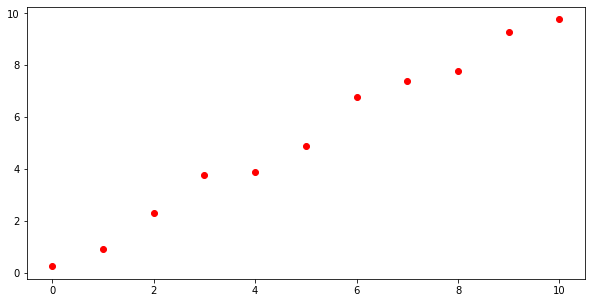

In [9]:
# Create figure and axis objects using subplots()
fig, axis = plt.subplots()

# Plort line using the axis.plot() method
line = axis.plot(times, distances, linestyle=' ', marker='o', color='red')

Notice how linestyle=' ' means no line at all, just markers. Also note that your plot style is different than the context figure; I've hidden some more complex styling with title text and grid lines.

### Plotting the Model on the Data
Continuing with the same measured data from the previous exercise, your goal is to use a predefined model() and measured data times and measured_distances to compute modeled distances, and then plot both measured and modeled data on the same axis.

In [10]:
def model(x, y, a0=0, a1=1):
    """
    Purpose: 
        For a given data set, input as two arrays, x and y, 
        compute the model value for all modeled values 'ym'
    Args:
        x (float, np.ndarray):
        y (float, np.ndarray): 
        a0 (float): default=0, coefficient for the Zeroth order term in the model, i.e. a0 + a1*x
        a1 (float): default=50, coefficient for the 1st order term in the model, i.e. a0 + a1*x
    Returns:
        ym (float, np.ndarray): model values corresponding to input x array, with the same length/size.
    """
    ym = a0 + (a1*x)
    return ym

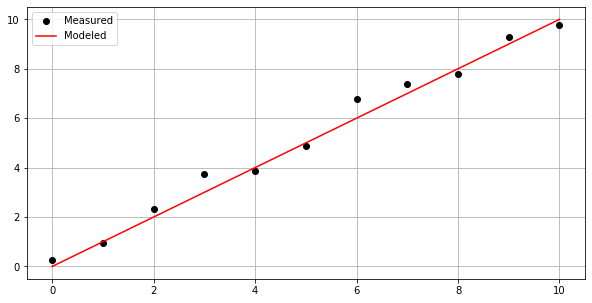

In [11]:
# Pass times and measured distances into model
model_distances = model(times, distances)

# Create figure and axis objects and call axis.plot() twice to plot data and model distances versus times
fig, axis = plt.subplots()
axis.plot(times, distances, linestyle=' ', marker='o', color='black', label='Measured');
axis.plot(times, model_distances, linestyle='-', marker=None, color='red', label='Modeled');

# Add grid lines and a legend to your plot
axis.grid(True);
axis.legend(loc='best');

### Visually Estimating the Slope & Intercept
Building linear models is an automated way of doing something we can roughly do "manually" with data visualization and a lot of trial-and-error. The visual method is not the most efficient or precise method, but it does illustrate the concepts very well, so let's try it!

Given some measured data, your goal is to guess values for slope and intercept, pass them into the model, and adjust your guess until the resulting model fits the data. 


In [12]:
xd = np.array([2.0, 2.5, 3.0, 3.5, 4.0, 4.5, 5.0, 5.5, 6.0, 6.5, 7.0])
yd = np.array([4.25, 4.43, 5.32, 6.26, 5.88, 6.38, 7.79, 7.88, 7.77, 8.77, 8.77])

In [13]:
def model(a0=2, a1=1):
    """
    Purpose: 
        For a given data set, input as two arrays, x and y, 
        compute the model value for all modeled values 'ym'
    Args:
        trial_intercept (float): default=0, coefficient for the Zeroth order term in the model, 
                                i.e. a0 + a1*x
        trial_slope (float): default=50, coefficient for the 1st order term in the model, i.e. a0 + a1*x\n    Returns:\n        xm (float, np.ndarray): model values for independent variable\n        ym (float, np.ndarray): model values of depedent variable, with the same length/size as xm.
    """
    xm = np.linspace(-5, 15, 41)
    ym = a0 + (a1*xm)
    return xm, ym

In [14]:
def plot_data_and_model(xd, yd, xm, ym):
    """
    Purpose:
        Plot both the measured data and the model on the same figure.
        Measured data will be black point markers with no line
        Modeled data will be a solid red line with no point markers
    Args:
        xd (np.ndarray): numpy array of indendent variable, measured data
        yd (np.ndarray): numpy array of dendent variable, measured data
        xm (np.ndarray): numpy array of indendent variable, model data
        ym (np.ndarray): numpy array of dendent variable, model data
    Returns:
        fig (plt.figure): matplotlib figure object
    """
    from matplotlib.ticker import MultipleLocator
    fig, axis = plt.subplots()
    axis.plot(xd, yd, color="black", linestyle=" ", marker="o", label="Measured")
    axis.plot(xm, ym, color="red", linestyle="-", marker=None, label="Modeled")
    axis.axvline(0, color='black')
    axis.axhline(0, color='black')
    axis.xaxis.set_major_locator(MultipleLocator(5.0))
    axis.xaxis.set_minor_locator(MultipleLocator(1.0))
    axis.yaxis.set_major_locator(MultipleLocator(5.0))
    axis.yaxis.set_minor_locator(MultipleLocator(1.0))
    axis.set_xlim([-11, 11])
    axis.set_ylim([-11, 11])
    axis.grid(True, which="both")
    axis.legend(loc=2)
    return fig

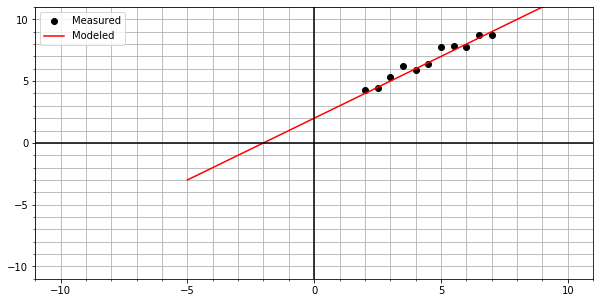

In [15]:
# Look at the plot data and guess initial trial values
trial_slope = 1
trial_intercept = 2

# input thoses guesses into the model function to compute the model values.
xm, ym = model(trial_intercept, trial_slope)

# Compare your your model to the data with the plot function
fig = plot_data_and_model(xd, yd, xm, ym)
plt.show()

# Repeat the steps above until your slope and intercept guess makes the model line up with the data.
final_slope = 1
final_intercept = 2

## Quantifying Linear Relationships


### Mean, Deviation, & Standard Deviation
The mean describes the center of the data. The standard deviation describes the spread of the data. But to compare two variables, it is convenient to normalize both. In this exercise, you are provided with two arrays of data, which are highly correlated, and you will compute and visualize the normalized deviations of each array.



In [16]:
x = np.array([ 3.20141089,  3.57332076,  4.2284669 ,  4.27233051,  4.49370529,
        4.5713193 ,  4.74611933,  4.9143694 ,  5.06416613,  5.12046366,
        5.1332596 ,  5.1382451 ,  5.19463348,  5.30012277,  5.32111385,
        5.361098  ,  5.3622485 ,  5.42139975,  5.55601804,  5.56564872,
        5.57108737,  5.60910021,  5.74438063,  5.82636432,  5.85993128,
        5.90529103,  5.98816951,  6.00284592,  6.2829785 ,  6.28362732,
        6.33858905,  6.3861864 ,  6.41291216,  6.57380586,  6.68822271,
        6.73736858,  6.9071052 ,  6.92746243,  6.97873601,  6.99734545,
        7.0040539 ,  7.17582904,  7.26593626,  7.49073203,  7.49138963,
        7.65143654,  8.18678609,  8.20593008,  8.23814334,  8.39236527])

y = np.array([ 146.48264883,  167.75876162,  229.73232314,  205.23686657,
        224.99693822,  239.79378267,  246.65838372,  264.14477475,
        268.91257002,  267.25180588,  248.54953839,  265.25831322,
        263.03153004,  251.08035094,  280.93733241,  276.53088378,
        268.59007072,  268.62252076,  265.21874   ,  280.37743899,
        283.47297931,  271.72788298,  299.42217399,  279.79758387,
        270.70401032,  306.18168601,  295.17313188,  298.81898515,
        305.35499931,  297.3187572 ,  330.10944498,  312.07619563,
        338.08560914,  337.16702908,  331.10617501,  325.46645358,
        337.66440893,  333.64162871,  370.85149057,  351.59390525,
        362.27985309,  345.48425572,  365.1976818 ,  386.90415177,
        371.05186831,  393.39852867,  397.95134137,  395.98005292,
        415.89087335,  415.63691073])

In [17]:
def plot_cdfs(dx, dy, zx, xy):
    array_index = list(range(len(x)))
    fig, axes = plt.subplots(nrows=2, ncols=1)
    axes[0].plot(array_index, dx, color="blue")
    axes[0].plot(array_index, dy, color="red")
    axes[0].set_ylabel("Deviations of X and Y")
    axes[1].plot(array_index, zx, color="blue")
    axes[1].plot(array_index, zy, color="red")
    axes[1].set_ylabel("Normalized Deviations of X and Y")
    axes[1].set_xlabel("Array Index")
    plt.tight_layout

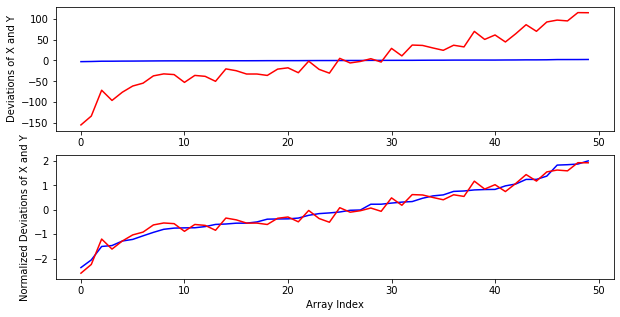

In [18]:
# Compute the deviations by subtracting the mean offset
dx = x - np.mean(x)
dy = y - np.mean(y)

# Normalize the data by dividing the deviations by the standard deviation
zx = dx / np.std(x)
zy = dy / np.std(y)

# Plot comparison of the raw data and the normalized data
fig = plot_cdfs(dx, dy, zx, zy)
plt.savefig('../images/plot_cdfs.png')

### Covariance vs Correlation
Covariance is a measure of whether two variables change ("vary") together. It is calculated by computing the products, point-by-point, of the deviations seen in the previous exercise, ```dx[n]*dy[n]```, and then finding the average of all those products.

Correlation is in essence the normalized covariance. In this exercise, you are provided with two arrays of data, which are highly correlated, and you will visualize and compute both the covariance and the correlation.

In [19]:
def plot_normalized_deviations(zx, zy):
    fig, axis = plt.subplots()
    lines = axis.plot(zx * zy, color="purple")
    axis.axhline(0, color="black", linestyle="--")
    axis.set_ylabel("Product of Normalized Deviations")
    axis.set_xlabel("Array Index")
    axis.set_title("Correlation = np.mean(zx*zy) = {:0.2f}".format(correlation))
    plt.show()
    return fig

Covariance:  69.67981827138166
Correlation:  0.9824333697735637


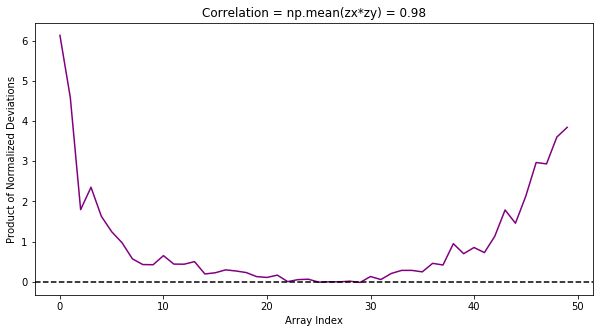

In [20]:
# Compute the covariance from the deviations
dx = x - np.mean(x)
dy = y - np.mean(y)
covariance = np.mean(dx * dy)
print("Covariance: ", covariance)

# Compute the correlation from the normalized deviations.
zx = dx / np.std(x)
zy = dy / np.std(y)
correlation = np.mean(zx * zy)
print("Correlation: ", correlation)

# Plot the normalized deviations for visual inspection
fig = plot_normalized_deviations(zx, zy)

### Correlation Strength
Intuitively, we can look at the plots provided and "see" whether the two variables seem to "vary together".

Recall that deviations differ from the mean, and we normalized by dividing the deviations by standard deviation. In this exercise you will compare the 3 data sets by computing correlation, and determining which data set has the most strongly correlated variables x and y. 

In [21]:
data_sets = {'A': {'correlation': np.nan,
  'x': np.array([ 2.55041235,  2.60839969,  2.79619981,  2.84385271,  3.15184751,
          3.21906477,  3.23462037,  3.33976744,  3.47394544,  3.56125803,
          3.67786134,  3.7339611 ,  3.86496991,  4.10019474,  4.24786673,
          4.24920164,  4.29714059,  4.31952159,  4.41315702,  4.41783781,
          4.42072788,  4.42420154,  4.62362038,  4.63538281,  4.70730828,
          4.7073288 ,  4.71777962,  4.82716962,  4.85543965,  4.98312847,
          5.08441026,  5.13865324,  5.21421035,  5.24607654,  5.26107949,
          5.30245284,  5.39280917,  5.42952286,  5.46962252,  5.62089269,
          5.67820005,  5.80961067,  5.92308322,  5.95929341,  6.02818114,
          6.32140278,  6.83206096,  6.90378732,  6.97401602,  7.31534773]),
  'y': np.array([  5.18184568,   5.12052882,   5.42316911,   5.84062449,
           6.5614449 ,   6.67094956,   6.25943637,   6.60223178,
           7.03070673,   7.36640234,   7.23592912,   7.42150745,
           7.45335607,   7.90133782,   8.69886493,   8.83746328,
           8.57627865,   8.88992641,   8.91672304,   8.67439568,
           8.93180467,   9.23291221,   9.23828425,   9.66192654,
           8.75968029,   9.62013323,   9.45732102,   9.57958741,
           9.73381949,   9.46936471,  10.11390254,  10.36658462,
          10.79789421,  10.36258554,  10.32003559,  10.47946642,
          11.01446886,  10.9412335 ,  10.80680499,  11.37010224,
          11.3806695 ,  11.86138259,  11.67065318,  11.83667129,
          11.95833524,  12.27692683,  13.73815199,  13.87283846,
          13.9493104 ,  14.57204868])},
 'B': {'correlation': np.nan,
  'x': np.array([ 2.19664381,  2.406278  ,  2.47343147,  2.72871597,  3.06636806,
          3.51128038,  3.87855402,  4.09926408,  4.18003832,  4.20434562,
          4.29194259,  4.41336839,  4.50269971,  4.58240329,  4.59650649,
          4.60918513,  4.74669209,  4.77111432,  4.82900646,  4.84738553,
          5.00264796,  5.01962047,  5.02286149,  5.04517742,  5.09524948,
          5.15589119,  5.24177672,  5.26908573,  5.30974025,  5.36136493,
          5.42179707,  5.50681676,  5.58929395,  5.69179864,  5.84444261,
          5.94426748,  6.05209339,  6.07448552,  6.07964661,  6.10895368,
          6.19165516,  6.23993253,  6.30742282,  6.30947322,  6.32371148,
          6.43754466,  6.64768944,  6.65144774,  6.79088371,  7.98870064]),
  'y': np.array([  7.75732279,  -0.97068431,  -0.66103018,   5.05375913,
           3.93976632,   6.44408273,   9.17318937,   8.05647607,
          10.62302986,  14.59132646,   4.68693984,   8.54535728,
          10.23727485,   8.33081153,  13.32821592,  -0.38344428,
          17.61579867,   4.97170349,  10.50554646,  12.51365356,
           6.86355506,  11.88747988,  12.86263588,  12.18438671,
           6.48548172,  18.34315419,  11.39140361,   5.92753502,
          13.14739828,  10.8807806 ,  12.70116343,  -3.24043311,
          16.46301037,  11.99411949,  12.34700338,  10.16815219,
          15.17366173,  16.0886504 ,  13.24263662,  17.78585212,
          12.70267957,  10.88000673,   8.5034434 ,  10.28007359,
          15.91379868,  12.5473011 ,  11.91631483,  15.41604806,
           9.30581229,  13.92987605])},
 'C': {'correlation': np.nan,
  'x': np.array([ 1.50176362,  1.96665095,  2.78558362,  2.84041313,  3.11713161,
          3.21414912,  3.43264917,  3.64296175,  3.83020766,  3.90057957,
          3.9165745 ,  3.92280638,  3.99329185,  4.12515346,  4.15139231,
          4.2013725 ,  4.20281062,  4.27674969,  4.44502255,  4.45706091,
          4.46385921,  4.51137526,  4.68047579,  4.7829554 ,  4.8249141 ,
          4.88161379,  4.98521188,  5.00355739,  5.35372312,  5.35453415,
          5.42323631,  5.482733  ,  5.5161402 ,  5.71725733,  5.86027839,
          5.92171072,  6.13388149,  6.15932804,  6.22342001,  6.24668181,
          6.25506737,  6.46978631,  6.58242032,  6.86341504,  6.86423703,
          7.06429567,  7.73348261,  7.7574126 ,  7.79767917,  7.99045658]),
  'y': np.array([-17.70183793, -12.68730947,  33.47056284,  -7.0881775 ,
           6.7091949 ,  23.53735376,  21.11660059,  35.3641024 ,
          31.59072152,  24.91144186,  -4.53019043,  20.56341545,
          13.01493562, -12.96994045,  30.97956936,  21.31852956,
           9.13346253,   4.82402639, -10.28277321,  12.10650699,
          16.42274434,  -4.27572923,  27.95621636,  -7.98933795,
         -24.3197774 ,  26.39886103,   3.51656715,   7.99064142,
          -2.69282132, -14.98633586,  30.93027062,  -0.05643774,
          37.60752021,  24.35144564,   6.68442643,  -5.53101698,
           0.5483712 ,  -7.08171402,  45.84065377,  15.1244233 ,
          30.91342343,  -7.33806017,  16.06140272,  32.57262109,
           8.36830187,  30.62642269,  -1.88612137,  -6.30071951,
          21.66576814,   9.91409021])}}

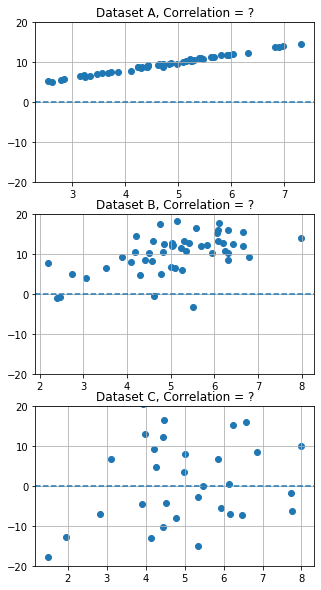

In [36]:
fig, axs = plt.subplots(3, 1, figsize=(5, 10))

axs[0].scatter(data_sets['A']['x'], data_sets['A']['y']);
axs[0].set_ylim([-20, 20]);
axs[0].axhline(0, linestyle='--');
axs[0].grid(True);
axs[0].set_title('Dataset A, Correlation = ?');
axs[1].scatter(data_sets['B']['x'], data_sets['B']['y']);
axs[1].set_ylim([-20, 20]);
axs[1].axhline(0, linestyle='--');
axs[1].grid(True);
axs[1].set_title('Dataset B, Correlation = ?');
axs[2].scatter(data_sets['C']['x'], data_sets['C']['y']);
axs[2].set_ylim([-20, 20]);
axs[2].axhline(0, linestyle='--');
axs[2].grid(True);
axs[2].set_title('Dataset C, Correlation = ?');

In [39]:
# Complete the function that will compute correlation.
def correlation(x,y):
    x_dev = x - np.mean(x)
    y_dev = y - np.mean(y)
    x_norm = x_dev / np.std(x)
    y_norm = y_dev / np.std(y)
    return np.mean(x_norm * y_norm)

# Compute and store the correlation for each data set in the list.
for name, data in data_sets.items():
    data['correlation'] = correlation(data['x'], data['y'])
    print('data set {} has correlation {:.2f}'.format(name, data['correlation']))

# Assign the data set with the best correlation.
best_data = data_sets['A']

data set A has correlation 1.00
data set B has correlation 0.54
data set C has correlation 0.09
